In [989]:
import matplotlib.pyplot as plt
import math
import numpy as np
import helpers as helpers

# 1.1 Basic example

Consider the initial value problem: 

`y'(t) = -λy(t)`, with `y(0) = 1`

For `λ = 100`, we have the following f(t,y(t)):

In [990]:
def f(tk, yk):
    return -100*yk

alfa = 1 # initial value

### Explicit Euler

In [991]:
def explicit_euler(tk, yk, h, f):
    return yk + h*f(tk,yk)
    
def iterate_in_method(method, n, a, b, alfa, f):
    h = (b-a)/n
    k = 0
    yk = alfa
    t_values = []
    y_values = []
    while k < n:
        tk = a + k*h
        yk = method(tk, yk, h, f)
        t_values.append(tk)
        y_values.append(yk)
        k += 1
    return t_values, y_values

We know the exact solution for this problem:

In [992]:
def exact_solution(t):
    return math.exp(-100*t)

Let's do an experiment to see how well the explicit euler method approximates the exact solution for different values of n:

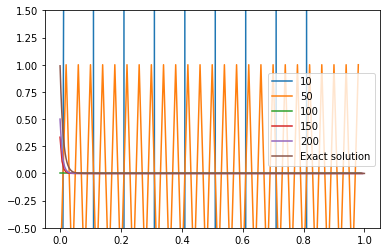

In [995]:
n_values = [10, 50, 100, 150, 200]

# Experiment
def plot_approximated_solution(method, a, b, alfa, f):
    for n in n_values:
        t_values, y_values = iterate_in_method(method, n, a, b, alfa, f)
        y_array = np.array(y_values)
        if y_array.ndim == 1:
            plt.plot(t_values, y_array, label=n)
        else:        
            for i in range(y_array.shape[1]):
                plt.plot(t_values, y_array[:,i], label='Approximated solution: y{}(t)'.format(i+1))

    
def plot_exact_solution(a, b):
    plot_resolution = 10000 # that is, how many points we want to plot in the curve
    step_size = (b-a)/plot_resolution
    i = 1
    exact_t_values = []
    exact_y_values = []
    while i <= plot_resolution:
        ti = a + step_size*i
        yi = exact_solution(ti)
        exact_t_values.append(ti)
        exact_y_values.append(yi)
        i += 1
    
    y_array = np.array(exact_y_values)
    if y_array.ndim == 1:
        plt.plot(exact_t_values, y_array, label='Exact solution')
    else:        
        for i in range(y_array.shape[1]):
            plt.plot(exact_t_values, y_array[:,i], label='Exact solution: y{}(t)'.format(i+1))

plot_approximated_solution(explicit_euler,0,1, alfa, f)
plot_exact_solution(0,1)

plt.legend()
plt.ylim(-.5, 1.5)
plt.show()

We can see that for `n = 10` and `n = 50` the method is unstable. For `n = 100` the approximation is constantly zero. For `n = 150` and `n = 200` the solution seems to be satisfatory.   

### Calculating the global error for Explicit Euler

We know that the global error is given by:

In [963]:
def global_error(t_values, approximated_y_values):
    error = 0
    for i in range(len(approximated_y_values)):
        t = t_values[i]
        exact_y_value = exact_solution(t)
        approximated_y_value = approximated_y_values[i]
        if math.fabs(exact_y_value - approximated_y_value) > error :
            error = math.fabs(exact_y_value - approximated_y_value)
    return error

In [964]:
# Global Error table

global_errors = []
for n in n_values:
    t_values, y_values = iterate_in_method(explicit_euler, n, 0, 1, alfa, f)
    global_errors.append([n, global_error(t_values, y_values)])    

print("n\tGlobal Error")
for n, error in global_errors:
    print(n, "\t", format(error, '.2e'))

n	Global Error
10 	 3.49e+09
50 	 2.00e+00
100 	 1.00e+00
150 	 6.67e-01
200 	 5.00e-01


### Implicit Euler

In [965]:
def implicit_euler(tk, yk, h, f):    
    return yk/(1 + 100*h)        

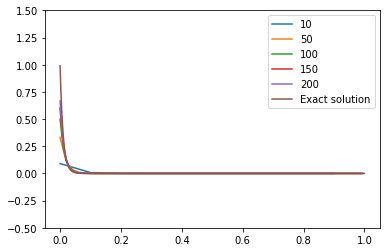

In [966]:
# Experiment
plot_approximated_solution(implicit_euler, 0, 1, alfa, f)
plot_exact_solution(0, 1)

plt.legend()
plt.ylim(-0.5, 1.5)
plt.show()

Unlike explicit euler, we can see that this method is stable for all values of n. Also, the global error is better for all values of n, as we can see in the table below:

In [967]:
# Global Error table for implicit euler

global_errors = []
for n in n_values:
    t_values, y_values = iterate_in_method(implicit_euler,n, 0, 1, alfa, f)
    global_errors.append([n, global_error(t_values, y_values)])    

print("n\tGlobal Error")
for n, error in global_errors:
    print(n, "\t", format(error, '.2e'))

n	Global Error
10 	 9.09e-01
50 	 6.67e-01
100 	 5.00e-01
150 	 4.00e-01
200 	 3.33e-01


If we look at the explicit euler method formula `yk + h*f(tk,yk)`, we realize that the step size `h` has huge impact on the behavior of the approximated solution. That is, when `h` is not small enough, it amplifies the evaluation of `f(tk, yk)` in such a way that the `yk` part of the sum is almost irrelevant and the method oscilates between arbitrarily big numbers rather than approximating the exact solution.

# 1.2 Another example

Let's consider the following equation:

```
y'(t) = λ(−y(t) + sin(t))
y(0) = 0
t ∈ [0, 2π]
```

We'll pick `λ = 10000` for our analysis:

In [968]:
def f(tk, yk):
    return 10000*(-1*yk + math.sin(tk)) 

alfa = 0 # initial value

The exact solution is given by the formula:

In [969]:
def exact_solution(t):
    C = 10000/(1 + 10000**2)
    return C*math.exp(-10000*t) + C*10000*math.sin(t) - C*math.cos(t)

### Explicit Euler

Let's do an experiment to see how well explicit euler goes:

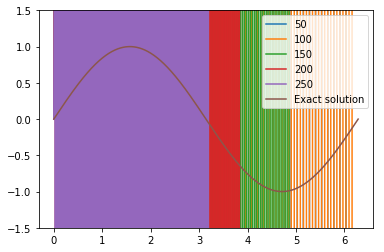

In [970]:
n_values = [50, 100, 150, 200, 250]

plot_approximated_solution(explicit_euler, 0, 2*math.pi, alfa, f)
plot_exact_solution(0, 2*math.pi)

plt.legend()
plt.ylim(-1.5, 1.5)
plt.show()

We can tell for the plot that explicit euler method performs very poorly in this case (it oscilates like crazy). It takes big values of n to converge. In fact, we need `n >= 31413` to have a satisfatory approximation in the whole interval, as we see in the experiment below:

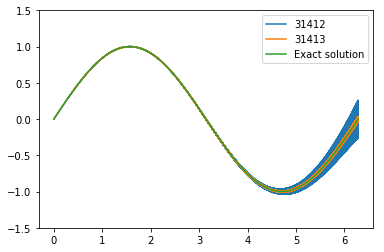

In [971]:
n_values = [31412,31413]

plot_approximated_solution(explicit_euler,0, 2*math.pi, alfa, f)
plot_exact_solution(0, 2*math.pi)

plt.legend()
plt.ylim(-1.5, 1.5)
plt.show()

### Runge-Kutta 4

In [972]:
def rk4(tk, yk, h, f):
    k1 = h*f(tk,yk)
    k2 = h*f(tk + h/2, yk + k1/2)
    k3 = h*f(tk + h/2, yk + k2/2)
    k4 = h*f(tk + h, yk + k3)
    return yk + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

Let's plot the RK4 for different values of n:

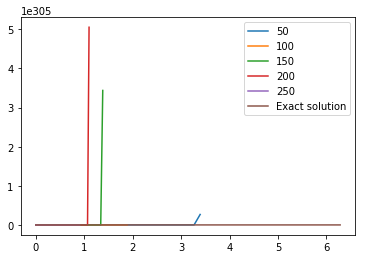

In [973]:
n_values = [50, 100, 150, 200, 250]
plot_approximated_solution(rk4, 0, 2*math.pi, alfa, f)
plot_exact_solution(0, 2*math.pi)

plt.legend()
plt.show()


We can see that the method does not converge for any of the `n` values above. We need higher values of `n` to have a good approximation in the whole interval using the RK4 method. For `n >= 22557`, we have satisfatory approximation:

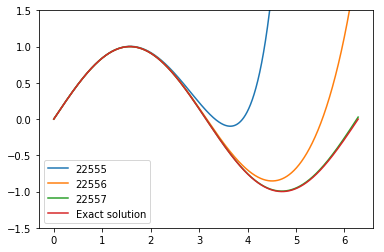

In [974]:
n_values = [22555, 22556, 22557]

plot_approximated_solution(rk4, 0, 2*math.pi, alfa, f)
plot_exact_solution(0, 2*math.pi)

plt.legend()
plt.ylim(-1.5, 1.5)
plt.show()

### Implicit Euler

In [975]:
def implicit_euler(tk, yk, h, f): 
    tkplus1 = tk + h
    return (yk + 10000*h*math.sin(tkplus1)) / (1 + 10000*h)

Let's analyse how implicit euler perform in this case:

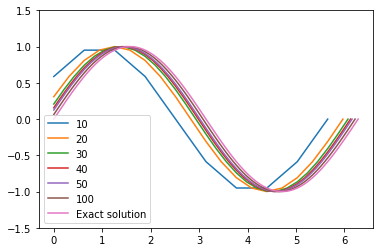

In [976]:
n_values = [10, 20, 30, 40, 50, 100]

plot_approximated_solution(implicit_euler, 0, 2*math.pi, alfa, f)
plot_exact_solution(0, 2*math.pi)

plt.legend()
plt.ylim(-1.5, 1.5)
plt.show()

We can tell that implicit euler performs much better than the other methods. Even for small numbers of n (e.g `n = 10`) we can say that the approximated solution roughly emulate the behaviour of the exact solution. For `n = 100`, it's reasonable to say that the approximated is satisfatory as it starts to become difficult to differ the approximated and the exact solution curve.

### Global errors for Explicit Euler, RK4 and Implicit Euler

Let's analyze the global errors in each method for different values of `n = 2^p`:

In [977]:
p_values = [10,11,12,13,14,15,16]
global_errors = []

for p in p_values:
    n = 2**p
    
    explicit_euler_t_values, explicit_euler_y_values = iterate_in_method(explicit_euler,n, 0, 2*math.pi, alfa, f)
    
    rk4_t_values, rk4_y_values = iterate_in_method(rk4,n, 0, 2*math.pi, alfa, f)
    
    implicit_euler_t_values, implicit_euler_y_values = iterate_in_method(implicit_euler,n, 0, 2*math.pi, alfa, f)
    
    global_errors.append([n, 
                          global_error(explicit_euler_t_values, explicit_euler_y_values),
                          global_error(rk4_t_values, rk4_y_values),
                          global_error(implicit_euler_t_values, implicit_euler_y_values)])

print("p\t n \tExplicit Euler\tRunge-Kutta 4\tImplicit Euler")

for p, [n, explicit_euler_error, rk4_error,implicit_euler_error] in zip(p_values, global_errors):
    print(p,
          "\t",
          n,
          "\t", 
          format(explicit_euler_error, ' ^8.2e'),
          "\t", 
          format(rk4_error, ' ^8.2e'), 
          "\t", 
          format(implicit_euler_error, ' ^8.2e'))

p	 n 	Explicit Euler	Runge-Kutta 4	Implicit Euler
10 	 1024 	   inf    	   inf    	 6.14e-03
11 	 2048 	   inf    	 7.02e+302 	 3.07e-03
12 	 4096 	   inf    	   inf    	 1.53e-03
13 	 8192 	   inf    	 1.32e+304 	 7.68e-04
14 	 16384 	   inf    	   inf    	 3.86e-04
15 	 32768 	 2.62e-04 	 1.93e-04 	 1.94e-04
16 	 65536 	 9.59e-05 	 9.59e-05 	 9.72e-05


# 1.3 Non-linear example

Let's consider the following initial-value problem:

```
y'(t) = y^2(t) - y^3(t)
y(0) = δ 
t ∈ [0, 2/δ]
```

In [978]:
def f(tk, yk):
    return math.pow(yk,2) - math.pow(yk,3)

We set the initial value to 0.01:

In [979]:
alfa = 0.01

### Explicit Euler

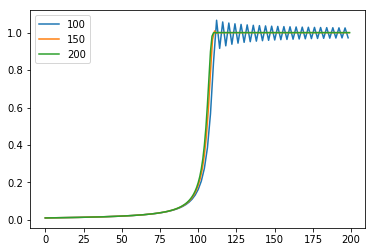

In [980]:
n_values = [100, 150, 200]

plot_approximated_solution(explicit_euler, 0, 2/alfa, alfa, f)

plt.legend()
plt.show()

For `n = 200`, the approximate solution is satisfatory

### Implicit Euler

In [981]:
def newton_method(ykplus1, yk, h, fn, fn_prime):
    return ykplus1 - (fn(ykplus1, yk, h)/fn_prime(ykplus1, yk, h))

def iterate_newton(steps, y0, h, fn, fn_prime):   
    yk = y0
    ykplus1 = y0 # initial guess
    for i in range(steps):
        last_ykplus1 = ykplus1        
        ykplus1 = newton_method(ykplus1, yk, h, fn, fn_prime)        
        yk = last_ykplus1
    return ykplus1
        
def fn(ykplus1, yk, h):
    return h*(ykplus1**3) - h*(ykplus1**2) + ykplus1 - yk

def fn_prime(ykplus1, yk, h):
    return 3*h*(ykplus1**2) - 2*h*(ykplus1) + 1

def implicit_euler(tk, yk, h, f):
    return iterate_newton(1, yk, h, fn, fn_prime)
    

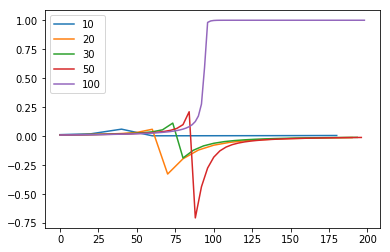

In [982]:
n_values = [10,20,30,50,100]

plot_approximated_solution(implicit_euler, 0, 2/alfa, alfa, f)

plt.legend()
plt.show()

For `n = 100`, the approximate solution is satisfatory.

# 2.2 Non-linear system of initial value problems

Let's consider the following linear system:

```
y'(t) = Ay(t) + f(t)
t ∈ [0, T]
```

We choose the following values for y0 and A:

In [1042]:
Y0 = np.array([1, 1, 1, 1, 1])

A = np.array([[-1,  0,  0,  0,  0],
              [ 0, -2,  0,  0,  0],
              [ 0,  0, -3,  0,  0],
              [ 0,  0,  0, -4,  0],
              [ 0,  0,  0,  0, -5]])

For `f(t) = 0`, we have the following `F(tk, y(tk))` for explicit euler method:

In [1026]:
def F(tk, Yk):
    return A.dot(Yk)

The exact solution is known:

In [1027]:
def exact_solution(t):
    return [math.exp(-1*t), math.exp(-2*t), math.exp(-3*t), math.exp(-4*t), math.exp(-5*t)]

### Explicit Euler:

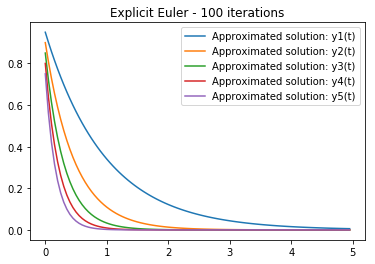

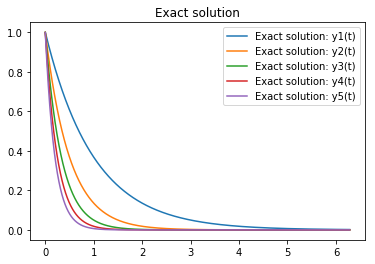

In [1083]:
n_values = [100]

plt.figure(1)
plot_approximated_solution(explicit_euler, 0, 5, Y0, F)
plt.title('Explicit Euler - 100 iterations')
plt.legend()

plt.figure(2)
plt.title('Exact solution')
plot_exact_solution(0, 5)
plt.legend()

plt.show()

### Implicit Euler:

In [1084]:
def implicit_euler(tk, yk, h, f):
    I = np.identity(len(A))    
    x = []
    b = []
    for y in yk:
        x.append(y)
        b.append(y)
        
    return helpers.gauss_seidel(I - h*A,x,b)

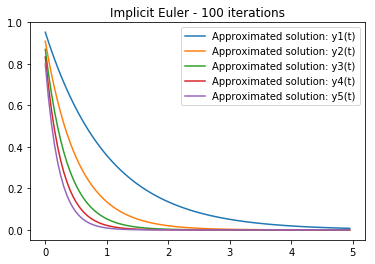

In [1085]:
n_values = [100]

plt.figure(1)
plot_approximated_solution(implicit_euler, 0, 5, Y0, F)
plt.legend()
plt.title('Implicit Euler - 100 iterations')

plt.show()

### Experimenting different values of λi

Now let's repeat the experiment with the following matrix A:

In [1088]:
A = np.array([[-2,  0,  0,  0,  0],
              [ 0, -4,  0,  0,  0],
              [ 0,  0, -6,  0,  0],
              [ 0,  0,  0, -8,  0],
              [ 0,  0,  0,  0, -10]])

We now have the following exact solution:

In [1089]:
def exact_solution(t):
    return [math.exp(-2*t), math.exp(-4*t), math.exp(-6*t), math.exp(-8*t), math.exp(-10*t)]

Let's plot both explicit and implicit approximation solutions:

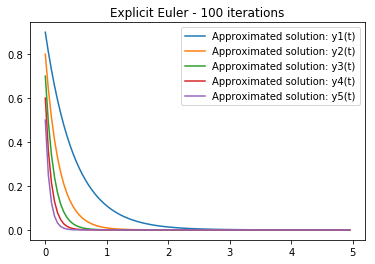

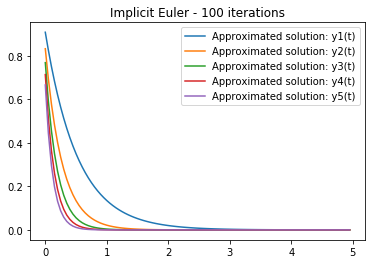

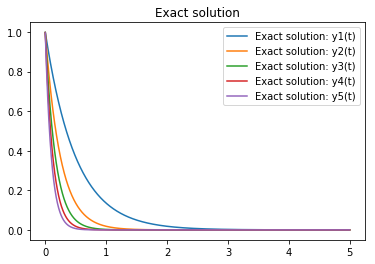

In [1090]:
n_values = [100]

plt.figure(1)
plot_approximated_solution(explicit_euler, 0, 5, Y0, F)
plt.legend()
plt.title('Explicit Euler - 100 iterations')


plt.figure(2)
plot_approximated_solution(implicit_euler, 0, 5, Y0, F)
plt.legend()
plt.title('Implicit Euler - 100 iterations')

plt.figure(3)
plt.title('Exact solution')
plot_exact_solution(0, 5)
plt.legend()

plt.show()

We can tell that the higher the magnitude of lambda, the more abrupt is the falling of the y curve. That's perfect reasonable because we know that the real solution is the exponential `y(t) = e^(lambda*t)` so, as lambda grows in magnitude, the derivative of the solution increases.

## 2.1.2 - Another matrix - Explicit Euler

Let's consider the following matrix A2:

In [1156]:
alfa1 = 1
alfa2 = 1
alfa3 = 1
alfa4 = 1
alfa5 = 1

A2 = np.array([[-2*alfa1,    alfa1,        0,        0,      0],
               [   alfa2, -2*alfa2,    alfa2,        0,        0],
               [       0,    alfa3, -2*alfa3,    alfa3,        0],
               [       0,        0,    alfa4, -2*alfa4,    alfa4],
               [       0,        0,        0,    alfa5, -2*alfa5]])

Y0 = [1, 1, 1, 1, 1]

Considering `f(t) = sin(πit)`, we have the following F(tk, y(tk)) for explicit euler method:

In [1157]:
def F(tk, Yk):
    fi = []
    for i in range(len(Yk)):
        fi.append(math.sin(math.pi*(i+1)*tk))
    return A2.dot(Yk) + fi

### Explicit Euler

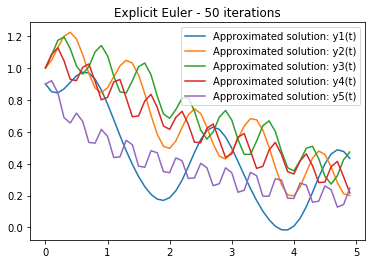

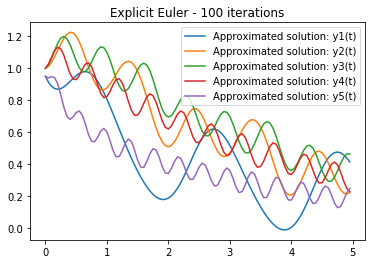

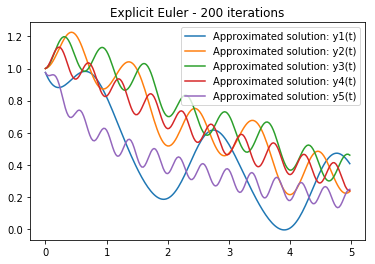

In [1158]:
n_values = [50]
plt.figure(1)
plot_approximated_solution(explicit_euler, 0, 5, Y0, F)
plt.title('Explicit Euler - 50 iterations')
plt.legend()
plt.show()

n_values = [100]
plt.figure(2)
plot_approximated_solution(explicit_euler, 0, 5, Y0, F)
plt.title('Explicit Euler - 100 iterations')
plt.legend()
plt.show()

n_values = [200]
plt.figure(3)
plot_approximated_solution(explicit_euler, 0, 5, Y0, F)
plt.title('Explicit Euler - 200 iterations')
plt.legend()
plt.show()

### Changing value of alfa

Let's see what happens if we change the value of one of the alfas:

In [1159]:
alfa1 = 100
alfa2 = 1
alfa3 = 1
alfa4 = 1
alfa5 = 1

A2 = np.array([[-2*alfa1,    alfa1,        0,        0,      0],
               [   alfa2, -2*alfa2,    alfa2,        0,        0],
               [       0,    alfa3, -2*alfa3,    alfa3,        0],
               [       0,        0,    alfa4, -2*alfa4,    alfa4],
               [       0,        0,        0,    alfa5, -2*alfa5]])

Y0 = [1, 1, 1, 1, 1]

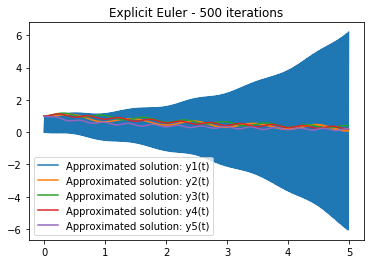

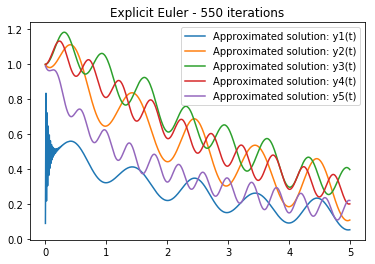

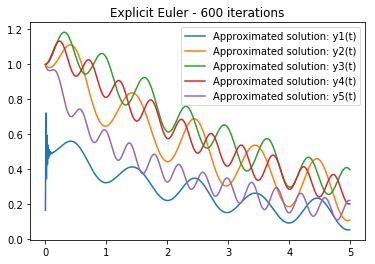

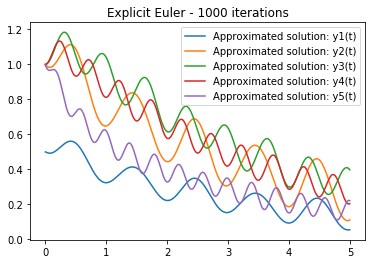

In [1160]:
n_values = [500]
plt.figure(1)
plot_approximated_solution(explicit_euler, 0, 5, Y0, F)
plt.title('Explicit Euler - 500 iterations')
plt.legend()
plt.show()

n_values = [550]
plt.figure(2)
plot_approximated_solution(explicit_euler, 0, 5, Y0, F)
plt.title('Explicit Euler - 550 iterations')
plt.legend()
plt.show()

n_values = [600]
plt.figure(3)
plot_approximated_solution(explicit_euler, 0, 5, Y0, F)
plt.title('Explicit Euler - 600 iterations')
plt.legend()
plt.show()

n_values = [1000]
plt.figure(3)
plot_approximated_solution(explicit_euler, 0, 5, Y0, F)
plt.title('Explicit Euler - 1000 iterations')
plt.legend()
plt.show()

We can tell from the plot that for `n = 550` the approximation starts to become satisfatory. However there still lot of noise for `y1(t)` around `t = 0`

## 2.1.3 - Implicit Euler

In [1189]:
def implicit_euler(tk, yk, h, f):
    tkplus1 = tk + h
    I = np.identity(len(A2))    
    x = []
    b = []
    for y,i in zip(yk, range(len(yk))):        
        x.append(y + h*math.sin(math.pi*(i+1)*tkplus1))
        b.append(y + h*math.sin(math.pi*(i+1)*tkplus1))        
    return helpers.gauss_seidel(I - h*A2,x,b)

Considering the matrix below:

In [1190]:
alfa1 = 1
alfa2 = 1
alfa3 = 1
alfa4 = 1
alfa5 = 1

A2 = np.array([[-2*alfa1,    alfa1,        0,        0,        0],
               [   alfa2, -2*alfa2,    alfa2,        0,        0],
               [       0,    alfa3, -2*alfa3,    alfa3,        0],
               [       0,        0,    alfa4, -2*alfa4,    alfa4],
               [       0,        0,        0,    alfa5, -2*alfa5]])

Y0 = [1, 1, 1, 1, 1]

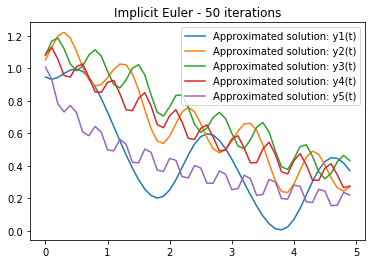

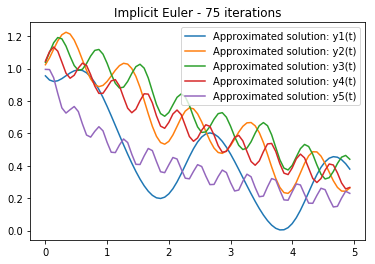

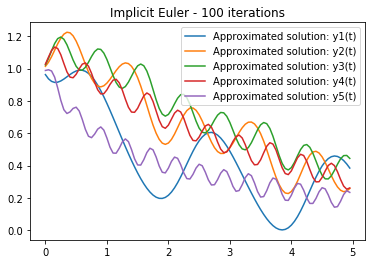

In [1198]:
n_values = [50]
plt.figure(1)
plot_approximated_solution(implicit_euler, 0, 5, Y0, F)
plt.legend()
plt.title('Implicit Euler - 50 iterations')

n_values = [75]
plt.figure(2)
plot_approximated_solution(implicit_euler, 0, 5, Y0, F)
plt.legend()
plt.title('Implicit Euler - 75 iterations')

n_values = [100]
plt.figure(3)
plot_approximated_solution(implicit_euler, 0, 5, Y0, F)
plt.legend()
plt.title('Implicit Euler - 100 iterations')

plt.show()

We can see that for `n = 100` the approximated solution is satisfatory.

### Changing the value of alfa again

Let's change the value of one of the alfas like below:

In [1208]:
alfa1 = 100
alfa2 = 1
alfa3 = 1
alfa4 = 1
alfa5 = 1

A2 = np.array([[-2*alfa1,    alfa1,        0,        0,        0],
               [   alfa2, -2*alfa2,    alfa2,        0,        0],
               [       0,    alfa3, -2*alfa3,    alfa3,        0],
               [       0,        0,    alfa4, -2*alfa4,    alfa4],
               [       0,        0,        0,    alfa5, -2*alfa5]])

Y0 = [1, 1, 1, 1, 1]

We now have the following behavior:

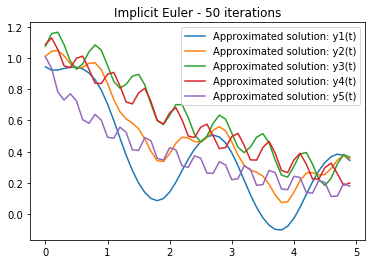

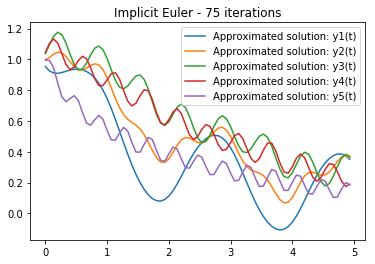

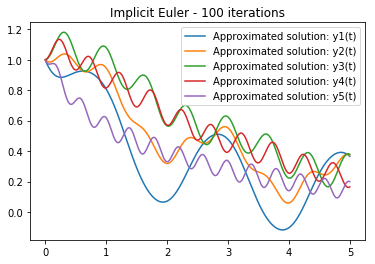

In [1207]:
n_values = [50]
plt.figure(1)
plot_approximated_solution(implicit_euler, 0, 5, Y0, F)
plt.legend()
plt.title('Implicit Euler - 50 iterations')

n_values = [75]
plt.figure(2)
plot_approximated_solution(implicit_euler, 0, 5, Y0, F)
plt.legend()
plt.title('Implicit Euler - 75 iterations')

n_values = [1000]
plt.figure(3)
plot_approximated_solution(implicit_euler, 0, 5, Y0, F)
plt.legend()
plt.title('Implicit Euler - 100 iterations')

plt.show()